## Assignment-2 Data Science

### Deep Nimesh Shah - B00796368
### Ravi Tulsi Zala - B00805073
***

### Libraries and Packages
****
#### Install NLTK platform and sklearn library
* Import tokenize module from nltk for splliting the setences into words. Commonly used words such as 'a','an','the' etc are known as Stop words are removed using the corpus module of nltk. Stemming process uses the stem module from nltk. Expressing the multiple words that occur commonly can be done using collocation module of nltk.

* Import the modules like feature extraction for converting corpus into bag of words and tfIdf representation. Text-classification using NaiveBayes and Support Vector Machine from sklearn modules. Confusion matrices are reported for test sets using the confusion matrix module of sklearn.

* Before using nltk platform, download the required libraries using  below commands in jupyter
    ```
    import nltk
    nltk.download()
    
    ```


In [123]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from nltk.tokenize import word_tokenize
import nltk
from nltk.probability import FreqDist
from nltk.collocations import *
from nltk.corpus import stopwords
import re
import pandas as pd
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plot

### Load Dataset 

* Fetch  the Data from only four news group such as alt.atheism, talk.religion.misc, comp.graphics, sci.space form the  20 newsgrup dataset

In [124]:
# https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html
# https://stackoverflow.com/questions/5618878/how-to-convert-list-to-string

categories_newsgroup = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

def loadData(categories_newsgroup):
    
    newsgroups_All = fetch_20newsgroups(categories=categories_newsgroup,subset='all')
    print("Number of Documents : " , newsgroups_All.filenames.shape[0])
    text_data = ' '.join(newsgroups_All.data) 
    return text_data,newsgroups_All

text_data, newsgroups_All =loadData(categories_newsgroup)

Number of Documents :  3387


### Q1 a)

### Tokenized Data


* We have tokenized the entire dataset in the list of words and display the 50 words to demonstrate from entire list of tokenized words.

In [125]:
# https://kite.com/python/docs/nltk.tokenize.word_tokenize
tokenized_word=word_tokenize(text_data)
print(tokenized_word[:50])

['From', ':', 'healta', '@', 'saturn.wwc.edu', '(', 'Tammy', 'R', 'Healy', ')', 'Subject', ':', 'Re', ':', 'who', 'are', 'we', 'to', 'judge', ',', 'Bobby', '?', 'Lines', ':', '38', 'Organization', ':', 'Walla', 'Walla', 'College', 'Lines', ':', '38', 'In', 'article', '<', '1993Apr14.213356.22176', '@', 'ultb.isc.rit.edu', '>', 'snm6394', '@', 'ultb.isc.rit.edu', '(', 'S.N', '.', 'Mozumder', ')', 'writes', ':']


### Part-Of-Speech (POS) tagging

Part of speech includes noun, pronoun, verb, adverb, adjective, conjunction, preposition, and interjection. NLTK module pos_tag is useful for tagging the words according part of speech.

Some of the tags for the grammar are : 

* VB verb, e.g. 'judge'
* NN noun, e.g. 'Subject'
* RB adverb, e.g 'very'
* JJ adjective, e.g. 'small'
* IN preposition, e.g. 'in'

Results :
* We have performed POS tagging for the tokenized words and display the 50 results

In [126]:
# https://www.nltk.org/book/ch05.html
# https://stackoverflow.com/questions/10897339/python-fetch-first-10-results-from-a-list
pos_tag_words = nltk.pos_tag(tokenized_word)
print(pos_tag_words[:50])

[('From', 'IN'), (':', ':'), ('healta', 'NN'), ('@', 'NN'), ('saturn.wwc.edu', 'NN'), ('(', '('), ('Tammy', 'NNP'), ('R', 'NNP'), ('Healy', 'NNP'), (')', ')'), ('Subject', 'NN'), (':', ':'), ('Re', 'NN'), (':', ':'), ('who', 'WP'), ('are', 'VBP'), ('we', 'PRP'), ('to', 'TO'), ('judge', 'VB'), (',', ','), ('Bobby', 'NNP'), ('?', '.'), ('Lines', 'NNS'), (':', ':'), ('38', 'CD'), ('Organization', 'NN'), (':', ':'), ('Walla', 'NNP'), ('Walla', 'NNP'), ('College', 'NNP'), ('Lines', 'NNP'), (':', ':'), ('38', 'CD'), ('In', 'IN'), ('article', 'NN'), ('<', '$'), ('1993Apr14.213356.22176', 'CD'), ('@', 'NNP'), ('ultb.isc.rit.edu', 'JJ'), ('>', 'NNP'), ('snm6394', 'NN'), ('@', 'NNP'), ('ultb.isc.rit.edu', 'NN'), ('(', '('), ('S.N', 'NNP'), ('.', '.'), ('Mozumder', 'NNP'), (')', ')'), ('writes', 'VBZ'), (':', ':')]


### Data Cleaning
Data cleaning is required before creating the bigrams otherwise bigrams result may consist special characters and unnecessary words which reduce the significance of creating the bigram.Only 200 results are displayed after cleaning the data.
Following Operations are performed to clean the data.

1. Remove the stop words ('are','is','everything' etc)
2. Remove the word with a single character (e.g. 'c','a' etc)
3. Remove special character and numbers ('@','.',')','(' etc)
4. Remove all the null values 

In [127]:
# https://stackoverflow.com/questions/43761318/python-remove-empty-element-by-list
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/27199837/strip-all-non-alphabetic-characters-from-beginning-of-python-string-w-o-using-re
# https://www.geeksforgeeks.org/python-program-check-string-contains-special-character/

stop_words=set(stopwords.words("english"))

def cleaningForBigrams(stop_words):
    
    filtered_sent=[]
    Remove_null = [] 
    basic_clean = []
    Remove_non_alphabetic = []
    
    pattern = re.compile('[@_!#$%^&*()<>?/\|}{~:]')
    
    tokenized_sent = tokenized_word
    for w in tokenized_sent:
        if w not in stop_words:
            filtered_sent.append(w)

    for w in filtered_sent:
        if ((len(re.sub(r'[^A-Za-z]', '', w)) == 1) or (len(w) == 1) or ( pattern.search(w) != None )):
            continue
        else:
            Remove_non_alphabetic.append(re.sub(r'[^A-Za-z]', '', w))

    null_removed = [x for x in Remove_non_alphabetic if x]
    basic_clean_list = null_removed
    
    return basic_clean_list

basic_clean_list = cleaningForBigrams(stop_words)
print(basic_clean_list[:200])

['From', 'healta', 'saturnwwcedu', 'Tammy', 'Healy', 'Subject', 'Re', 'judge', 'Bobby', 'Lines', 'Organization', 'Walla', 'Walla', 'College', 'Lines', 'In', 'article', 'Apr', 'ultbiscritedu', 'snm', 'ultbiscritedu', 'SN', 'Mozumder', 'writes', 'From', 'snm', 'ultbiscritedu', 'SN', 'Mozumder', 'Subject', 'Re', 'judge', 'Bobby', 'Date', 'Wed', 'Apr', 'GMT', 'In', 'article', 'healta', 'saturnwwcedu', 'healta', 'saturnwwcedu', 'TAMMY', 'HEALY', 'writes', 'Bobby', 'would', 'like', 'take', 'liberty', 'quote', 'Christian', 'writer', 'named', 'Ellen', 'White', 'hope', 'said', 'help', 'edit', 'remarks', 'group', 'future', 'Do', 'set', 'standard', 'Do', 'make', 'opinions', 'views', 'duty', 'interpretations', 'scripture', 'criterion', 'others', 'heart', 'condemn', 'come', 'ideal', 'Thoughts', 'Fromthe', 'Mount', 'Blessing', 'hope', 'quoting', 'nt', 'make', 'atheists', 'gag', 'think', 'Ellen', 'White', 'put', 'better', 'could', 'Tammy', 'Point', 'Peace', 'Bobby', 'Mozumder', 'My', 'point', 'set', 

### Q1 b)

### Collocation 
It is considered as a phrase which consists of multiple words that are co-occur in the text.
For ex. In the set of education related document word 'Machine learning' co-occur together rather than individual word 'Machine' and 'Learning'.

### Bigrams
Bigram is concatenation of two words which is considered as an individual words which helps to improve insight analysis of the text document while solving NLP related problems.

We have used below four techniques to filter out meaningful collocations from the document.
1. Frequency Counting
2. Pointwise Mutual Information (PMI)
3. T-test 
4. Chi-square


### Frequency without filter

To count the frequency for the bigrams ngram_fd.items() from the class BigramCollocationFinder is used. This method will return bigram_freq which is a doctionary.It is casted to a list and sorted using the frequency. Below function does not filter out the collocations.

In [128]:
def freqBigramsBeforeFiltering(basic_clean_list):
    
    bigrams = nltk.collocations.BigramAssocMeasures()
    bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(basic_clean_list)
    bigram_freq = bigramFinder.ngram_fd.items()
    bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
    return bigrams,bigramFinder,bigramFreqTable
    
bigrams,bigramFinder,bigramFreqTable = freqBigramsBeforeFiltering(basic_clean_list)  
print("Frequency Without Filter : \n \n")
bigramFreqTable.head(20)

Frequency Without Filter : 
 



,bigram,freq
5,"(Subject, Re)",2434
15,"(In, article)",1954
14,"(Lines, In)",1015
16,"(article, Apr)",570
1307,"(writes, In)",554
3217,"(ca, nt)",505
1298,"(Organization, University)",495
2053,"(Lines, NNTPPostingHost)",471
243,"(Distribution, world)",368
160,"(Lines, Distribution)",316


### Pointwise Mutual Information (PMI)

PMI is a measure for how a one word is associated to other word in n-grams.

A pmi(x,y) = 0 means that the words  x and y are  independent, positive PMI means x and y co-occur more frequently than,and negative PMI means they cooccur less frequently. PMI is calculated as shown in the below formula :


#### Note :-

PMI is generally used after filtering out the collocations as it is more sensitive to independent words which co-occur rarely. In the below function PMI is used on unfiltered collocations.

In [129]:
def getPMI(bigramFinder,bigrams):
    
    bigramPMITable_PMI = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram_pmi','PMI']).sort_values(by='PMI', ascending=False)
    return bigramPMITable_PMI
    
bigramPMITable_PMI = getPMI(bigramFinder,bigrams)
print("Pointwise Mutual Information (PMI) : \n \n")
bigramPMITable_PMI.head(20)

Pointwise Mutual Information (PMI) : 
 



,bigram_pmi,PMI
0,"(AAO, AngloAustralian)",19.217605
1804,"(expound, Ambrose)",19.217605
1796,"(evolutionaire, eindprodukten)",19.217605
1797,"(evolutions, hitherto)",19.217605
1798,"(exasperating, Sexism)",19.217605
1799,"(excepting, Pfaith)",19.217605
1800,"(excessively, darken)",19.217605
1801,"(exiled, Assyrian)",19.217605
1802,"(experi, ences)",19.217605
1803,"(expired, gunpowder)",19.217605


### Chi Square
Chi Square test is useful for testing or rejecting null hypothesis. Chi square test works well with the categorical data. It gives the information based on how data is divided among categories but it can not suggest the meaningfulness. Null hypothesis means there is no relationship between two variables are zero or independent variables. Function below will show top 20 results of the dataframe.

In [130]:
def getChiSq(bigramFinder,bigrams):

    bigramTtable_chisq = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.chi_sq)), columns=['bigram_chi','chi_sq']).sort_values(by='chi_sq', ascending=False)
    return bigramTtable_chisq

bigramTtable_chisq = getChiSq(bigramFinder,bigrams)
print("Chi Square (Hypothesis Testing) : \n \n")
bigramTtable_chisq.head(20)

Chi Square (Hypothesis Testing) : 
 



,bigram_chi,chi_sq
0,"(AAAA, BBBB)",609643.0
2631,"(finn, bscno)",609643.0
2633,"(firstcome, firstserved)",609643.0
2634,"(firstest, mostest)",609643.0
2635,"(fischer, iesdaucdk)",609643.0
2636,"(fitz, cseogiedu)",609643.0
2637,"(flagellating, genuflecting)",609643.0
2638,"(flamboyant, orgies)",609643.0
2639,"(flatten, steamroller)",609643.0
2640,"(flb, flboptiplanfi)",609643.0


### T-test without filter

It is useful to check whethere two categories are statistically different from each other.Rejecting null hypothesis means there is not a different between the means of the variables. Difference between those variables is meaningful. It will show top 20 results of the dataframe.

In [131]:
def getTtestWithoutFilter(bigramFinder,bigrams):
    
    bigramTable_ttest = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.student_t)), columns=['bigram_ttest','t']).sort_values(by='t', ascending=False)
    return bigramTable_ttest
    
bigramTable_ttest = getTtestWithoutFilter(bigramFinder,bigrams)
print("Ttest Without Filter (Hypothesis Testing) : \n \n")
bigramTable_ttest.head(20)

Ttest Without Filter (Hypothesis Testing) : 
 



,bigram_ttest,t
0,"(Subject, Re)",49.026437
1,"(In, article)",43.941015
2,"(Lines, In)",31.301873
3,"(article, Apr)",23.720673
4,"(writes, In)",22.935838
5,"(ca, nt)",22.298068
6,"(Organization, University)",21.862747
7,"(Lines, NNTPPostingHost)",21.471784
8,"(Distribution, world)",19.134433
9,"(Lines, Distribution)",17.570933


### Note:- 
From the above result of Frequency bigram and T-test method, it is observed that results consists of prepopositions, articles which does not give the meaningful result.
To avoid this issue, we have filtered the bigram with (noun,noun) and (adjective,noun)


### Function to Filter Bigrams

Filtering the tags according to the Adjectives and noun types as shown in the below function. 

In [132]:
#function to filter for ADJ/NN bigrams
type_1 = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
type_2 = ('NN', 'NNS', 'NNP', 'NNPS')

def filterBigramsUsingTypes(bigram,type_1,type_2):
    
    tags = nltk.pos_tag(bigram)
    if tags[0][1] in type_1 and tags[1][1] in type_2:
        return True
    else:
        return False
    

### Frequency With Filter

In the below function, each bigram from bigramFreqTable is checked against the tags mentioned in the above function. It will show top 20 results of the dataframe.

In [133]:
def getFreqWithFilter(bigramFreqTable):
    
    
    filtered_freq_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: filterBigramsUsingTypes(x,type_1,type_2))]
    return filtered_freq_bi
    
filtered_freq_bi = getFreqWithFilter(bigramFreqTable)
print("Frequency With Filter : \n \n")
filtered_freq_bi.head(20)

Frequency With Filter : 
 



,bigram,freq
5,"(Subject, Re)",2434
16,"(article, Apr)",570
1298,"(Organization, University)",495
2053,"(Lines, NNTPPostingHost)",471
243,"(Distribution, world)",368
160,"(Lines, Distribution)",316
1526,"(world, NNTPPostingHost)",216
2429,"(sandvik, newtonapplecom)",211
2207,"(Henry, Spencer)",179
1168,"(Computer, Science)",175


### T-test with Filter

In the below function, each bigram from bigramTable_ttest is checked against the tags mentioned in the filterBigramsUsingTypes() function. It will show top 20 results of the dataframe.

In [134]:
def getTtestWithFilter(bigramTable_ttest):
    
    filtered_bi_ttest = bigramTable_ttest[bigramTable_ttest.bigram_ttest.map(lambda x: filterBigramsUsingTypes(x,type_1,type_2))]
    return filtered_bi_ttest
    
filtered_bi_ttest=getTtestWithFilter(bigramTable_ttest)
print("Ttest With Filter : \n \n")
filtered_bi_ttest.head(20)

Ttest With Filter : 
 



,bigram_ttest,t
0,"(Subject, Re)",49.026437
3,"(article, Apr)",23.720673
6,"(Organization, University)",21.862747
7,"(Lines, NNTPPostingHost)",21.471784
8,"(Distribution, world)",19.134433
9,"(Lines, Distribution)",17.570933
11,"(world, NNTPPostingHost)",14.609433
12,"(sandvik, newtonapplecom)",14.519644
15,"(Henry, Spencer)",13.374119
16,"(Computer, Science)",13.203624


### Q-1 c)

### Comparing the Result of Different Techniques

* Frequency and T-test with filter methods give similar tuples as shown in the dataframe below. Using both the methods shows the overlapping of the tuples.
* There are other methods like Mean and Variance, Likelihood Ratio which can be combined with the below methods to a distribution of the data to find the goodness of fit. Though T-test uses the Mean values internally.
* Chi Square and PMI also gives the results which are better than the results obtained from the T-test and Frequency without filtering.
* Good collocation has high PMI scores because the difference between the probability of co-occurance of words and frequency of words is low. Combining the Frequency and PMI can be good for getting the best results in terms of collocation extraction.

In [135]:
def convertDfToSeries(df,resultsToShow,columnName):
    
    resultSeries = pd.Series()
    series = df.head(resultsToShow)[columnName]
    return list(series)
    

freqList = convertDfToSeries(df=filtered_freq_bi,resultsToShow=20,columnName='bigram') 
ttestList = convertDfToSeries(df=filtered_bi_ttest,resultsToShow=20,columnName='bigram_ttest')   
chiList= convertDfToSeries(df=bigramTtable_chisq,resultsToShow=20,columnName='bigram_chi')   
pmiList = convertDfToSeries(df=bigramPMITable_PMI,resultsToShow=20,columnName='bigram_pmi')   

# https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/

zippedList =list(zip(freqList,ttestList,chiList,pmiList))

comparisonDf = pd.DataFrame(zippedList, columns = ['Frequency Filter','Ttest','Chi Square', 'PMI'])
comparisonDf                  

,Frequency Filter,Ttest,Chi Square,PMI
0,"(Subject, Re)","(Subject, Re)","(AAAA, BBBB)","(AAO, AngloAustralian)"
1,"(article, Apr)","(article, Apr)","(finn, bscno)","(expound, Ambrose)"
2,"(Organization, University)","(Organization, University)","(firstcome, firstserved)","(evolutionaire, eindprodukten)"
3,"(Lines, NNTPPostingHost)","(Lines, NNTPPostingHost)","(firstest, mostest)","(evolutions, hitherto)"
4,"(Distribution, world)","(Distribution, world)","(fischer, iesdaucdk)","(exasperating, Sexism)"
5,"(Lines, Distribution)","(Lines, Distribution)","(fitz, cseogiedu)","(excepting, Pfaith)"
6,"(world, NNTPPostingHost)","(world, NNTPPostingHost)","(flagellating, genuflecting)","(excessively, darken)"
7,"(sandvik, newtonapplecom)","(sandvik, newtonapplecom)","(flamboyant, orgies)","(exiled, Assyrian)"
8,"(Henry, Spencer)","(Henry, Spencer)","(flatten, steamroller)","(experi, ences)"
9,"(Computer, Science)","(Computer, Science)","(flb, flboptiplanfi)","(expired, gunpowder)"


### Q-2 a)
### Clean the text:

### 1. Removal of Stop-words:
Stop words such as "a" "and" "but," "how" "or" and "what" are removed from the database as a part of the cleaning process to reduce the dimensional space while performing text mining.

In [136]:
#tokenized_text_clean = word_tokenize(newsgroups_All) 
stop_words=list(stopwords.words("english"))

def removeStopWords(stop_words):
    
    tokenized_word = []
    list1=[]
    list2=[]
    Remove_stopword=[]
    
    for i in newsgroups_All.data:
        tokenized_word.append(word_tokenize(i))
   
    for i in range(len(tokenized_word)):
        for j in range(len(tokenized_word[i])):
            #print(tokenized_word[i][j])
            if tokenized_word[i][j].lower() not in stop_words:
                list1.append(tokenized_word[i][j])
        list2.append(list1)
        list1=[]
    
    return list2
    
listAfterRemovingStopWords = removeStopWords(stop_words)
print(listAfterRemovingStopWords[0])

[':', 'healta', '@', 'saturn.wwc.edu', '(', 'Tammy', 'R', 'Healy', ')', 'Subject', ':', ':', 'judge', ',', 'Bobby', '?', 'Lines', ':', '38', 'Organization', ':', 'Walla', 'Walla', 'College', 'Lines', ':', '38', 'article', '<', '1993Apr14.213356.22176', '@', 'ultb.isc.rit.edu', '>', 'snm6394', '@', 'ultb.isc.rit.edu', '(', 'S.N', '.', 'Mozumder', ')', 'writes', ':', '>', ':', 'snm6394', '@', 'ultb.isc.rit.edu', '(', 'S.N', '.', 'Mozumder', ')', '>', 'Subject', ':', ':', 'judge', ',', 'Bobby', '?', '>', 'Date', ':', 'Wed', ',', '14', 'Apr', '1993', '21:33:56', 'GMT', '>', 'article', '<', 'healta.56.734556346', '@', 'saturn.wwc.edu', '>', 'healta', '@', 'saturn.wwc.edu', '(', 'TAMMY', 'R', 'HEALY', ')', 'writes', ':', '>', '>', 'Bobby', ',', '>', '>', '>', '>', 'would', 'like', 'take', 'liberty', 'quote', 'Christian', 'writer', 'named', '>', '>', 'Ellen', 'G.', 'White', '.', 'hope', 'said', 'help', 'edit', '>', '>', 'remarks', 'group', 'future', '.', '>', '>', '>', '>', "''", 'set', 'stan

### 2. Remove Numbers and all Non-characters
To remove all non-characters such as digits, special character(@,!,&) we have replace them with empty string.

In [137]:
def removeNonCharacters(listAfterRemovingStopWords):
    
    Remove_noncharacter=[]
    list_after_removing_nonchars=[]
    for i in range(len(listAfterRemovingStopWords)):
        for j in range(len(listAfterRemovingStopWords[i])):
            Remove_noncharacter.append(re.sub(r'[^A-Za-z]', '', listAfterRemovingStopWords[i][j]))
        list_after_removing_nonchars.append(Remove_noncharacter)
        Remove_noncharacter=[]
        
    return list_after_removing_nonchars
    
list_after_removing_nonchars= removeNonCharacters(listAfterRemovingStopWords)
print(list_after_removing_nonchars[0])

['', 'healta', '', 'saturnwwcedu', '', 'Tammy', 'R', 'Healy', '', 'Subject', '', '', 'judge', '', 'Bobby', '', 'Lines', '', '', 'Organization', '', 'Walla', 'Walla', 'College', 'Lines', '', '', 'article', '', 'Apr', '', 'ultbiscritedu', '', 'snm', '', 'ultbiscritedu', '', 'SN', '', 'Mozumder', '', 'writes', '', '', '', 'snm', '', 'ultbiscritedu', '', 'SN', '', 'Mozumder', '', '', 'Subject', '', '', 'judge', '', 'Bobby', '', '', 'Date', '', 'Wed', '', '', 'Apr', '', '', 'GMT', '', 'article', '', 'healta', '', 'saturnwwcedu', '', 'healta', '', 'saturnwwcedu', '', 'TAMMY', 'R', 'HEALY', '', 'writes', '', '', '', 'Bobby', '', '', '', '', '', 'would', 'like', 'take', 'liberty', 'quote', 'Christian', 'writer', 'named', '', '', 'Ellen', 'G', 'White', '', 'hope', 'said', 'help', 'edit', '', '', 'remarks', 'group', 'future', '', '', '', '', '', '', 'set', 'standard', '', 'make', 'opinions', '', 'views', '', '', 'duty', '', 'interpretations', 'scripture', '', 'criterion', 'others', '', '', 'hear

### Remove Null Values
We have removed all the null values from the dataset as a part of the cleaning and display the sample result.
In the result, it can be clearly seen that there are no null values present.

In [138]:
def removeNulls(list_after_removing_nonchars):
    
    list_after_removing_nulls=[]
    for i in range(len(list_after_removing_nonchars)):
        list_after_removing_nulls.append([x for x in list_after_removing_nonchars[i] if x])
    
    return list_after_removing_nulls
    
list_after_removing_nulls = removeNulls(list_after_removing_nonchars)
print(list_after_removing_nulls[0])

['healta', 'saturnwwcedu', 'Tammy', 'R', 'Healy', 'Subject', 'judge', 'Bobby', 'Lines', 'Organization', 'Walla', 'Walla', 'College', 'Lines', 'article', 'Apr', 'ultbiscritedu', 'snm', 'ultbiscritedu', 'SN', 'Mozumder', 'writes', 'snm', 'ultbiscritedu', 'SN', 'Mozumder', 'Subject', 'judge', 'Bobby', 'Date', 'Wed', 'Apr', 'GMT', 'article', 'healta', 'saturnwwcedu', 'healta', 'saturnwwcedu', 'TAMMY', 'R', 'HEALY', 'writes', 'Bobby', 'would', 'like', 'take', 'liberty', 'quote', 'Christian', 'writer', 'named', 'Ellen', 'G', 'White', 'hope', 'said', 'help', 'edit', 'remarks', 'group', 'future', 'set', 'standard', 'make', 'opinions', 'views', 'duty', 'interpretations', 'scripture', 'criterion', 'others', 'heart', 'condemn', 'come', 'ideal', 'Thoughts', 'Fromthe', 'Mount', 'Blessing', 'p', 'hope', 'quoting', 'nt', 'make', 'atheists', 'gag', 'think', 'Ellen', 'White', 'put', 'better', 'could', 'Tammy', 'Point', 'Peace', 'Bobby', 'Mozumder', 'point', 'set', 'views', 'way', 'believe', 'Saying', '

### Stem the words
Stemming is the process of reducing a word to its roots of words known as a lemma.
Ex. stemming for root word like include:
1. likes 2. likely 3. liking 4. liked

We have used Potter’s Stemmer algorithm which produces best output as compared to other stemmers and it has less error rate.

In [139]:
# https://www.geeksforgeeks.org/introduction-to-stemming/
# https://www.tutorialspoint.com/python/python_stemming_algorithms
def stemmingProcess(list_after_removing_nulls):
    
    stemmed_words=[]
    temp_stemmed_words=[]
    
    for i in range(len(list_after_removing_nulls)):
        for j in range(len(list_after_removing_nulls[i])):
            temp_stemmed_words.append(PorterStemmer().stem(list_after_removing_nulls[i][j]))
        stemmed_words.append(temp_stemmed_words)
        temp_stemmed_words=[]
        
    return stemmed_words

stemmed_words = stemmingProcess(list_after_removing_nulls)
print(stemmed_words[0])

['healta', 'saturnwwcedu', 'tammi', 'R', 'heali', 'subject', 'judg', 'bobbi', 'line', 'organ', 'walla', 'walla', 'colleg', 'line', 'articl', 'apr', 'ultbiscritedu', 'snm', 'ultbiscritedu', 'SN', 'mozumd', 'write', 'snm', 'ultbiscritedu', 'SN', 'mozumd', 'subject', 'judg', 'bobbi', 'date', 'wed', 'apr', 'gmt', 'articl', 'healta', 'saturnwwcedu', 'healta', 'saturnwwcedu', 'tammi', 'R', 'heali', 'write', 'bobbi', 'would', 'like', 'take', 'liberti', 'quot', 'christian', 'writer', 'name', 'ellen', 'G', 'white', 'hope', 'said', 'help', 'edit', 'remark', 'group', 'futur', 'set', 'standard', 'make', 'opinion', 'view', 'duti', 'interpret', 'scriptur', 'criterion', 'other', 'heart', 'condemn', 'come', 'ideal', 'thought', 'fromth', 'mount', 'bless', 'p', 'hope', 'quot', 'nt', 'make', 'atheist', 'gag', 'think', 'ellen', 'white', 'put', 'better', 'could', 'tammi', 'point', 'peac', 'bobbi', 'mozumd', 'point', 'set', 'view', 'way', 'believ', 'say', 'eveil', 'world', 'caus', 'atheism', 'ridicul', 'cou

In [140]:
clean_data=[]

for i in range(len(stemmed_words)):
    clean_data.append(' '.join(stemmed_words[i]))


### Q-2 b)

### bag-of-words 
In order to perform text mining,first we need to turn the text content into numerical feature vectors. We cannot feed Raw data or a sequence of words directly to the algorithms or model as most of the model expects numerical feature vectors. scikit-learn provides utilities to extract numerical features from text content, i.e:

1. **Tokenizing**:- Giving an integer id for each possible token, 
2. **Counting**:-  The occurrences of tokens in every document.
2. **Normalizing**:- Giving weights to the token which occur majority in the documnet.

tokenization, counting and normalization is also known the Bag of Words
Using CountVectorizer we can implement tokenization and occurrence counting in a single class.

 CountVectorizer **class fit_transform()** method converts the data into term-document sparse matrix.

In [141]:
# https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html
#https://scikit-learn.org/stable/modules/feature_extraction.html
def convertToBagOfWords(clean_data):
    
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(clean_data)
    return X_train_counts

X_train_counts = convertToBagOfWords(clean_data)

X_train_counts.shape

(3387, 31715)

**tf stands  Term Frequency**. 
It is calculated by dividing  total number of times a term occurs in the document by the total number of terms present in the document.

**idf stands for Inverse Document Frequency**. 
It is calculated by taking the logarithmic of the total number of documents in the divided by the number of documents in which the term has present. This normalization is to up-weigh the rare terms in the corpus.

**tf-idf** helps us to rank the importance of a term to the document in its contextual document corpus.

For example , let assume that the search query is "what is birthplace of John snow". During searching for documents to this query, we need to give the least importance to words "what","is","of" and give more importance to "John","snow" and "birthplace".Due to low idf value of "what" , "is" , "of" , their contribution will be very low to the calculation of relevance of a document to the query . Documents having high occurance of "John","Snow" and "birthplace" will get more weight and hence better rank .

In [142]:
# https://www.quora.com/What-is-a-tf-idf-vector
# https://scikit-learn.org/stable/modules/feature_extraction.html
def convertToTfIdf(X_train_counts):
    
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    return X_train_tfidf
    
X_train_tfidf = convertToTfIdf(X_train_counts)
X_train_tfidf.shape

(3387, 31715)

### Q-2 c)
### Text Classification

Text classification is performed on data represented using the Bag Of Wods and TF-IDF vector representation. Data is split randomly using the train_test_split()  of sklearn module with 70% Trainset Size and 30% Testset size. Prefix X shows the data except the target column in both the sets whereas Prefix y shows the target column data.

In [143]:
X_train, X_test,y_train,y_test = train_test_split(X_train_tfidf,newsgroups_All.target,test_size = 0.3)

### Split arrays or matrices into train and test subsets
Text classification is performed on data represented using the Bag Of Wods and TF-IDF vector representation. Data is split randomly using the train_test_split()  of sklearn module with 70% Trainset Size and 30% Testset size. Prefix X shows the data except the target column in both the sets whereas Prefix y shows the target column data.

In [144]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
print(y_test.shape[0])

(2370, 31715)
(1017, 31715)
2370
1017


We have built our model using **Multinomial Naive Bayes** and **Support Vector Machine** classifier to calculate training and testing score.
From the below experiment, we can say that test score of SVM is higher which is **95.08%** while test score for Naive Bayes is **92.62%**.

**Parameters selection for SVM**

1. **degree** :- Default value for this parameter is 3. It is the degree of the polynomial kernal function and ignored by all other kernel.
2. **C** :- This parameter tells the SVM optimization to how much we want to avoid misclassifying each training example
3. **Gamma** :- Gamma parameter defines how far the influence of a single training example reaches, with low values meaning far and  high values means the close.
4. **kernel**:- It defines type of the kernel used in the algorithm. It can be linear, poly, rbf or sigmoid.

In [145]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# https://www.quora.com/What-are-C-and-gamma-with-regards-to-a-support-vector-machine
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34
def classifyDatasets(classifier,classifierName):
    
    classifierTrainset = classifier.fit(X_train, y_train)
    accTrain = classifierTrainset.score(X_train, y_train) * 100
    print('\t \t Accuracy of '+ classifierName +' on training set: ' + str(accTrain))
    
    accTest = classifierTrainset.score(X_test, y_test) * 100
    print('\t \t Accuracy of '+ classifierName +' on Test set: ' + str(accTest),'\n')
    
    y_train_pred = classifierTrainset.predict(X_train)
    cm_train=pd.DataFrame(confusion_matrix(y_train, y_train_pred),index=newsgroups_All.target_names,columns=newsgroups_All.target_names)
    
    y_test_pred = classifierTrainset.predict(X_test)
    cm_test=pd.DataFrame(confusion_matrix(y_test, y_test_pred),index=newsgroups_All.target_names,columns=newsgroups_All.target_names)

    return cm_train,cm_test,accTrain,accTest

multinomialNBClf = MultinomialNB()
cm_trainNB,cm_testNB,accTrainNB,accTestNB = classifyDatasets(classifier=multinomialNBClf,
                                                         classifierName="Multinomial Naive Bayes Classifier ")

svmClf = svm.SVC(C=1.0, kernel='linear')
cm_trainSVM,cm_test_SVM,accTrainSVM,accTestSVM = classifyDatasets(classifier=svmClf,
                                                         classifierName="Support Vector Machine Classifier ")


	 	 Accuracy of Multinomial Naive Bayes Classifier  on training set: 95.73839662447257
	 	 Accuracy of Multinomial Naive Bayes Classifier  on Test set: 92.62536873156341 

	 	 Accuracy of Support Vector Machine Classifier  on training set: 99.53586497890295
	 	 Accuracy of Support Vector Machine Classifier  on Test set: 95.08357915437561 



### Confusion Matrix:-
Confusion matrix is a table which is used to tell us about performance of the classifier on the test data for which
the true values are known to us.
It helps us to determine confusion between the classes. Most commonly performance are measured with the help of confusion matrix.

### Confusion Matrix for Multinomial Naive Bayes
Majority confusion is observed between alt.atheism and talk.religion.misc.
From the below confusion matrix of NB we can say that 54 documents whose actual value is classification is talk.religion.misc are classified as alt.atheism

In [146]:
cm_testNB

,alt.atheism,comp.graphics,sci.space,talk.religion.misc
alt.atheism,248,2,1,2
comp.graphics,0,292,4,0
sci.space,0,3,284,0
talk.religion.misc,54,0,9,118


### Confusion Matrix for SVM
As accuracy of SVM is higher, it is observed that there is very less confusion among the different classifier as compared to the Multinomial Naive Byes.

In [147]:
cm_test_SVM

,alt.atheism,comp.graphics,sci.space,talk.religion.misc
alt.atheism,235,3,0,15
comp.graphics,0,295,1,0
sci.space,1,7,278,1
talk.religion.misc,13,8,1,159


###  Comparison of score between Multinomial Naive Byes and SVM
We have plotted the bar chart which shows the accuracy (score) of Multinomial Naive Bayes and Support Vector Machine (SVM).
From the graph we can easily conclude that SVM has a higher accuracy.

**justification**:- Support Vector Machine (SVM) gives better result with the full-length content whereas Multinomial Naive Bayes (MNB) is better at snippets and short documents.
In our dataset there are large documents which makes SVM as ideal candidate in terms of accuracy. When there are more training cases SVM provides good accuracy as compared to NVB.
The advantage of SVMs is its robustness. Moreover, SVMs do not require any hyperparameter for tuning as it can append good parameters by its own. SVMs generalize way better than MNB which removes the need for the feature selection.


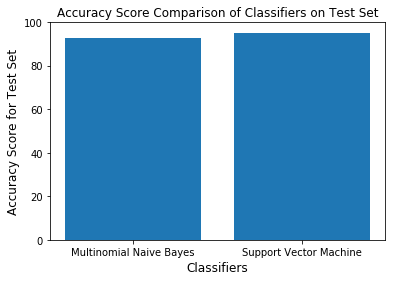

In [148]:
def compareResults(classifiers,accuracies, setType, scoreName):
    
    index = np.arange(len(classifiers))
    plot.bar(index, accuracies)
    plot.xlabel('Classifiers', fontsize=12)
    plot.ylabel(scoreName + ' Score for '+ setType +' Set', fontsize=12)
    plot.xticks(index, classifiers, fontsize=10)
    plot.title(scoreName + ' Score Comparison of Classifiers on '+ setType +' Set')
    plot.show()

classifiersList = ["Multinomial Naive Bayes", "Support Vector Machine"]    
testAccuracies = [accTestNB,accTestSVM]
compareResults(classifiers=classifiersList, accuracies=testAccuracies, setType="Test",scoreName="Accuracy")

### Change in SVM Kernels to check the effect on Accuracy and Confusion

* From the above graph , it is clearly seen that the Linear Kernel is well suited for text classification. Most importantly The Linear Kernel is computationally very cheap when compared to other Kernels.
* The linear kernel is good when there is a lot of features. That's because mapping the data to a higher dimensional space does not really improve the performance.
* SVM kernels are data dependent which means Linear SVMs works well with the linearly separable data. When you train a SVM with a linear kernel, you only need to optimize the C regularization parameter.So for choosing the best parameters we need to use GridSearchCV which is time consuming and not good performancewise.
* When you train a SVM with other kernels such as Polynomial Kernel, Radial Basis Function (RBF), Sigmoid Kernel , it is quite time consuming and also decrease the accuracy to ~29%. Trying those kernels also increase the confusion as shown in the confusion matrix.
* Tuning of the Regularization parameter C and othe parameters like degree is important as High C values tend to overfit. So it is recommended to use the low C value for the better accuracy and performance.

Sources : [Various Kernels Discussion :](https://www.researchgate.net/post/Is_it_necessary_to_choose_kernels_in_SVM_according_to_application)

In [149]:
def svmKernal(kernal_name):
    
    SVM_clf  = svm.SVC( kernel=kernal_name,C=10, degree=3, gamma='auto')
    cm_trainSVM,cm_test_SVM,accTrainSVM,accTestSVM = classifyDatasets(classifier=SVM_clf,
                                                         classifierName="Support Vector Machine Classifier ")
    print(cm_test_SVM)
    return cm_test_SVM
    
print("Using Polynomial Kernel \n")
cm_test_SVM_poly = svmKernal(kernal_name = 'poly')
print("Using RBF Kernel \n")
cm_test_SVM_string = svmKernal(kernal_name = 'rbf')
print("Using Sigmoid Kernel \n")
cm_test_SVM_sig = svmKernal(kernal_name = 'sigmoid')

Using Polynomial Kernel 

	 	 Accuracy of Support Vector Machine Classifier  on training set: 29.535864978902953
	 	 Accuracy of Support Vector Machine Classifier  on Test set: 28.220255653883974 

                    alt.atheism  comp.graphics  sci.space  talk.religion.misc
alt.atheism                   0              0        253                   0
comp.graphics                 0              0        296                   0
sci.space                     0              0        287                   0
talk.religion.misc            0              0        181                   0
Using RBF Kernel 

	 	 Accuracy of Support Vector Machine Classifier  on training set: 29.535864978902953
	 	 Accuracy of Support Vector Machine Classifier  on Test set: 28.220255653883974 

                    alt.atheism  comp.graphics  sci.space  talk.religion.misc
alt.atheism                   0              0        253                   0
comp.graphics                 0              0        296        

### Q-2 d)
### POS Tagging in Raw Data

#### Tokenizing Raw Data 

We have tokenized the entire raw dataset using word_tokenize() which will be applied to each and every sentence and tokenize it. We are displaying the some of words in list to demonstrate from entire list of tokenized words.

In [150]:
def tokenizeRawData():

    tokenized_word_raw = []
    for i in newsgroups_All.data:
        tokenized_word_raw.append(word_tokenize(i))
    return tokenized_word_raw

tokenized_word_raw = tokenizeRawData()
print(tokenized_word_raw[0])

['From', ':', 'healta', '@', 'saturn.wwc.edu', '(', 'Tammy', 'R', 'Healy', ')', 'Subject', ':', 'Re', ':', 'who', 'are', 'we', 'to', 'judge', ',', 'Bobby', '?', 'Lines', ':', '38', 'Organization', ':', 'Walla', 'Walla', 'College', 'Lines', ':', '38', 'In', 'article', '<', '1993Apr14.213356.22176', '@', 'ultb.isc.rit.edu', '>', 'snm6394', '@', 'ultb.isc.rit.edu', '(', 'S.N', '.', 'Mozumder', ')', 'writes', ':', '>', 'From', ':', 'snm6394', '@', 'ultb.isc.rit.edu', '(', 'S.N', '.', 'Mozumder', ')', '>', 'Subject', ':', 'Re', ':', 'who', 'are', 'we', 'to', 'judge', ',', 'Bobby', '?', '>', 'Date', ':', 'Wed', ',', '14', 'Apr', '1993', '21:33:56', 'GMT', '>', 'In', 'article', '<', 'healta.56.734556346', '@', 'saturn.wwc.edu', '>', 'healta', '@', 'saturn.wwc.edu', '(', 'TAMMY', 'R', 'HEALY', ')', 'writes', ':', '>', '>', 'Bobby', ',', '>', '>', '>', '>', 'I', 'would', 'like', 'to', 'take', 'the', 'liberty', 'to', 'quote', 'from', 'a', 'Christian', 'writer', 'named', '>', '>', 'Ellen', 'G.', 

#### POS tagging



In [151]:
def posTaggingRawData(tokenized_word_raw):

    pos_tag_raw = []
    for i in range(len(tokenized_word_raw)):
        pos_tag_raw.append(nltk.pos_tag(tokenized_word_raw[i]))
        
    return pos_tag_raw

pos_tag_raw = posTaggingRawData(tokenized_word_raw)
print(pos_tag_raw[0])

[('From', 'IN'), (':', ':'), ('healta', 'NN'), ('@', 'NN'), ('saturn.wwc.edu', 'NN'), ('(', '('), ('Tammy', 'NNP'), ('R', 'NNP'), ('Healy', 'NNP'), (')', ')'), ('Subject', 'NN'), (':', ':'), ('Re', 'NN'), (':', ':'), ('who', 'WP'), ('are', 'VBP'), ('we', 'PRP'), ('to', 'TO'), ('judge', 'VB'), (',', ','), ('Bobby', 'NNP'), ('?', '.'), ('Lines', 'NNS'), (':', ':'), ('38', 'CD'), ('Organization', 'NN'), (':', ':'), ('Walla', 'NNP'), ('Walla', 'NNP'), ('College', 'NNP'), ('Lines', 'NNP'), (':', ':'), ('38', 'CD'), ('In', 'IN'), ('article', 'NN'), ('<', '$'), ('1993Apr14.213356.22176', 'CD'), ('@', 'NNP'), ('ultb.isc.rit.edu', 'JJ'), ('>', 'NNP'), ('snm6394', 'NN'), ('@', 'NNP'), ('ultb.isc.rit.edu', 'NN'), ('(', '('), ('S.N', 'NNP'), ('.', '.'), ('Mozumder', 'NNP'), (')', ')'), ('writes', 'VBZ'), (':', ':'), ('>', 'NN'), ('From', 'IN'), (':', ':'), ('snm6394', 'NN'), ('@', 'NN'), ('ultb.isc.rit.edu', 'NN'), ('(', '('), ('S.N', 'NNP'), ('.', '.'), ('Mozumder', 'NNP'), (')', ')'), ('>', 'NN'

### Extract the Noun
We have extracted all the noun using the below function from the Dataset.
For cleaning we have performed the same process which we used in the Question 2.

In [152]:
def extractNouns(pos_tag_raw):
    
    l1=[]
    final_pos=[]
    new_list=[]
    for i in range(len(pos_tag_raw)):
        l1 = pos_tag_raw[i]
        df=pd.DataFrame(l1)
        l2=df[0].tolist()
        l3=df[1].tolist()
        for j in range(len(l2)):
            if l3[j] == 'NN' or l3[j] == 'NNS' or l3[j] == 'NNP' or l3[j] == 'NNPS' :
                new_list.append(l2[j])
        final_pos.append(new_list)
        new_list=[]
    
    return final_pos

final_pos = extractNouns(pos_tag_raw)
print(final_pos[0])

['healta', '@', 'saturn.wwc.edu', 'Tammy', 'R', 'Healy', 'Subject', 'Re', 'Bobby', 'Lines', 'Organization', 'Walla', 'Walla', 'College', 'Lines', 'article', '@', '>', 'snm6394', '@', 'ultb.isc.rit.edu', 'S.N', 'Mozumder', '>', 'snm6394', '@', 'ultb.isc.rit.edu', 'S.N', 'Mozumder', '>', 'Re', 'Bobby', '>', 'Date', 'Wed', 'Apr', 'GMT', '>', 'article', '<', 'healta.56.734556346', '@', 'saturn.wwc.edu', '>', 'healta', '@', 'saturn.wwc.edu', 'TAMMY', 'R', 'HEALY', '>', '>', 'Bobby', '>', '>', '>', '>', 'liberty', 'writer', '>', '>', 'Ellen', 'G.', 'White', '>', '>', 'remarks', 'group', 'future', '>', '>', 'Do', 'standard', 'opinions', 'views', 'duty', 'interpretations', 'scripture', 'criterion', 'others', '>', '>', 'heart', 'ideal', '>', 'Thoughts', 'Fromthe', 'Mount', 'Blessing', 'p.', '>', '>', '>', '>', 'atheists', 'Ellen', 'White', '>', '>', '>', '>', 'Tammy', '>', '>', 'Point', '>', '>', 'Peace', '>', '>', 'Bobby', 'Mozumder', '>', 'My', 'point', 'views', 'way', 'eveil', 'world', 'athe

In [153]:
def removeNoncharcterPos(final_pos):

    Remove_noncharacter_pos=[]
    Remove_noncharacter_final_pos=[]
    for i in range(len(final_pos)):
        for j in range(len(final_pos[i])):
            Remove_noncharacter_pos.append(re.sub(r'[^A-Za-z]', '', final_pos[i][j]))
        Remove_noncharacter_final_pos.append(Remove_noncharacter_pos)
        Remove_noncharacter_pos=[]
        
    return Remove_noncharacter_final_pos

Remove_noncharacter_final_pos = removeNoncharcterPos(final_pos)    
print(Remove_noncharacter_final_pos[0])

['healta', '', 'saturnwwcedu', 'Tammy', 'R', 'Healy', 'Subject', 'Re', 'Bobby', 'Lines', 'Organization', 'Walla', 'Walla', 'College', 'Lines', 'article', '', '', 'snm', '', 'ultbiscritedu', 'SN', 'Mozumder', '', 'snm', '', 'ultbiscritedu', 'SN', 'Mozumder', '', 'Re', 'Bobby', '', 'Date', 'Wed', 'Apr', 'GMT', '', 'article', '', 'healta', '', 'saturnwwcedu', '', 'healta', '', 'saturnwwcedu', 'TAMMY', 'R', 'HEALY', '', '', 'Bobby', '', '', '', '', 'liberty', 'writer', '', '', 'Ellen', 'G', 'White', '', '', 'remarks', 'group', 'future', '', '', 'Do', 'standard', 'opinions', 'views', 'duty', 'interpretations', 'scripture', 'criterion', 'others', '', '', 'heart', 'ideal', '', 'Thoughts', 'Fromthe', 'Mount', 'Blessing', 'p', '', '', '', '', 'atheists', 'Ellen', 'White', '', '', '', '', 'Tammy', '', '', 'Point', '', '', 'Peace', '', '', 'Bobby', 'Mozumder', '', 'My', 'point', 'views', 'way', 'eveil', 'world', 'atheism', 'newsgroups', 'posts', 'spirit', 'condemnation', 'atheists', 'newsgroup', 

In [154]:
def removeNullsPos(Remove_noncharacter_final_pos):
    
    Remove_null_pos=[]
    for i in range(len(Remove_noncharacter_final_pos)):
        Remove_null_pos.append([x for x in Remove_noncharacter_final_pos[i] if x])
   
    return Remove_null_pos

Remove_null_pos = removeNullsPos(Remove_noncharacter_final_pos)
print(Remove_null_pos[0])

['healta', 'saturnwwcedu', 'Tammy', 'R', 'Healy', 'Subject', 'Re', 'Bobby', 'Lines', 'Organization', 'Walla', 'Walla', 'College', 'Lines', 'article', 'snm', 'ultbiscritedu', 'SN', 'Mozumder', 'snm', 'ultbiscritedu', 'SN', 'Mozumder', 'Re', 'Bobby', 'Date', 'Wed', 'Apr', 'GMT', 'article', 'healta', 'saturnwwcedu', 'healta', 'saturnwwcedu', 'TAMMY', 'R', 'HEALY', 'Bobby', 'liberty', 'writer', 'Ellen', 'G', 'White', 'remarks', 'group', 'future', 'Do', 'standard', 'opinions', 'views', 'duty', 'interpretations', 'scripture', 'criterion', 'others', 'heart', 'ideal', 'Thoughts', 'Fromthe', 'Mount', 'Blessing', 'p', 'atheists', 'Ellen', 'White', 'Tammy', 'Point', 'Peace', 'Bobby', 'Mozumder', 'My', 'point', 'views', 'way', 'eveil', 'world', 'atheism', 'newsgroups', 'posts', 'spirit', 'condemnation', 'atheists', 'newsgroup', 'atheists', 'position', 'attacks', 'messgae', 'quote', 'everyone']


In [155]:
def stemmingProcessPos(Remove_null_pos):
    
    stemmed_words_pos=[]
    temp_stemmed_words_pos=[]

    for i in range(len(Remove_null_pos)):
        for j in range(len(Remove_null_pos[i])):
            temp_stemmed_words_pos.append(PorterStemmer().stem(Remove_null_pos[i][j]))
        stemmed_words_pos.append(temp_stemmed_words_pos)
        temp_stemmed_words_pos=[]
        
    return stemmed_words_pos

stemmed_words_pos = stemmingProcessPos(Remove_null_pos)
print(stemmed_words_pos[0])

['healta', 'saturnwwcedu', 'tammi', 'R', 'heali', 'subject', 'Re', 'bobbi', 'line', 'organ', 'walla', 'walla', 'colleg', 'line', 'articl', 'snm', 'ultbiscritedu', 'SN', 'mozumd', 'snm', 'ultbiscritedu', 'SN', 'mozumd', 'Re', 'bobbi', 'date', 'wed', 'apr', 'gmt', 'articl', 'healta', 'saturnwwcedu', 'healta', 'saturnwwcedu', 'tammi', 'R', 'heali', 'bobbi', 'liberti', 'writer', 'ellen', 'G', 'white', 'remark', 'group', 'futur', 'Do', 'standard', 'opinion', 'view', 'duti', 'interpret', 'scriptur', 'criterion', 'other', 'heart', 'ideal', 'thought', 'fromth', 'mount', 'bless', 'p', 'atheist', 'ellen', 'white', 'tammi', 'point', 'peac', 'bobbi', 'mozumd', 'My', 'point', 'view', 'way', 'eveil', 'world', 'atheism', 'newsgroup', 'post', 'spirit', 'condemn', 'atheist', 'newsgroup', 'atheist', 'posit', 'attack', 'messga', 'quot', 'everyon']


In [156]:
clean_data_pos=[]

for i in range(len(stemmed_words_pos)):
    clean_data_pos.append(' '.join(stemmed_words_pos[i]))
    
#print(clean_data_pos)

###  Data Representation : Bag of Words and TF - IDF

Explanation of the code and theory for Data representation techniques, Bag of Words and TF-IDF, will be the same as   explained in Answer 2(b)

#### Vocabulary Comparison
Vocabulary is seen decreased clearly from the shape attribute. Here it shows tuple (3387,25229) which  means 3387 documents and 25229 words. In previous Question that tuple was (3387,31715) which shows the 3387 documents and 31715 words. These results show that size of words is decreased after cleaning and  extracting only nouns from the documents.

In [157]:
X_train_counts = convertToBagOfWords(clean_data_pos)
X_train_counts.shape

(3387, 25233)

In [158]:
X_train_tfidf =convertToTfIdf(X_train_counts)
X_train_tfidf.shape

(3387, 25233)

### Text Classification in Data Represented in Bag Of Words and TF-IDF

Data split and classification explanation will be the same as explained in Answer 2(c)

In [159]:
X_train, X_test,y_train,y_test = train_test_split(X_train_tfidf,newsgroups_All.target,test_size = 0.3)

In [160]:
multinomialNBClf = MultinomialNB()
cm_trainNB,cm_testNB,newAccTrainNB,newAccTestNB = classifyDatasets(classifier=multinomialNBClf,
                                                         classifierName="Multinomial Naive Bayes Classifier ")

svmClf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
cm_trainSVM,cm_test_SVM,newAccTrainSVM,newAccTestSVM = classifyDatasets(classifier=svmClf,
                                                         classifierName="Support Vector Machine Classifier ")

	 	 Accuracy of Multinomial Naive Bayes Classifier  on training set: 96.41350210970464
	 	 Accuracy of Multinomial Naive Bayes Classifier  on Test set: 93.41199606686332 

	 	 Accuracy of Support Vector Machine Classifier  on training set: 99.40928270042194
	 	 Accuracy of Support Vector Machine Classifier  on Test set: 95.37856440511308 



### Accuracy Comparison compared to that of answer 2(c)

Accuracy remains almost the same for extracting nouns and other types words from data and extracting only nouns from data which can be easily seen from the Accuracy comparison bar graph.
To be precise, we can say that there is slight increase in the accuracy of SVM and Multinomial Naive Bayes Classifier. 

### Note:- 
We have used functions to perform all the operations in this Assignment.
This way re-usability of the code is improved.
For ex. To create a model and compare the accuracy in the Q-2 d) we have directly called the functions which were
previously created to create model and find the score.

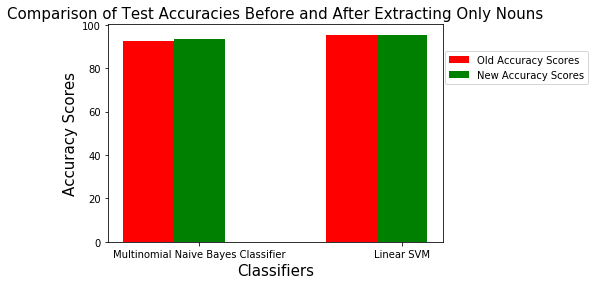

In [161]:
def accuracyComprison(classifiers,accuracies,accuraciesNew):

    index = np.arange(len(classifiers))
    bar_width = 0.25
    legend = ['Old Accuracy Scores','New Accuracy Scores']
    plot.bar(index, accuracies, bar_width,color='red',label='Old Accuracy Scores')
    plot.bar(index + bar_width, accuraciesNew, bar_width,color='green',label='New Accuracy Scores')
    plot.xlabel('Classifiers',fontsize=15)
    plot.ylabel('Accuracy Scores',fontsize=15)
    plot.title('Comparison of Test Accuracies Before and After Extracting Only Nouns',fontsize=15)
    plot.xticks(index + bar_width, classifiers)
    plot.legend(legend,loc=7,bbox_to_anchor=(1.45, 0.8))
    plot.show()

listOfTestAccuracies  = [accTestNB,accTestSVM]
listTestAccNew = [newAccTestNB,newAccTestSVM]    
listOfClassifiers = ["Multinomial Naive Bayes Classifier","Linear SVM"]
accuracyComprison(classifiers = listOfClassifiers,accuracies = listOfTestAccuracies, accuraciesNew = listTestAccNew)    


### Reference

### References

1. https://stats.stackexchange.com/questions/58214/when-does-naive-bayes-perform-better-than-svm

2. https://towardsdatascience.com/machine-learning-nlp-text-classification-using-scikit-learn-python-and-nltk-c52b92a7c73a

3. Lab-6 https://dal.brightspace.com/d2l/le/content/97462/viewContent/1340766/View

4. Lab-3 https://dal.brightspace.com/d2l/le/content/97462/viewContent/1332237/View

5. https://stackoverflow.com/questions/35360081/naive-bayes-vs-svm-for-classifying-text-data

6. https://stats.stackexchange.com/questions/58214/when-does-naive-bayes-perform-better-than-svm

7. https://stats.stackexchange.com/questions/73944/what-are-the-limitations-of-kernel-methods-and-when-to-use-kernel-methods
